<a href="https://colab.research.google.com/github/mohammad0alfares/Credit-Card-Fraud-Detection/blob/master/CreditCardFraudDetection_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About The data set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. 




# Import Data from Drive

Please download the data from https://www.kaggle.com/mlg-ulb/creditcardfraud

Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os 


In [ ]:
os.chdir("/content/drive/My Drive/CreditCard")

In [ ]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content/drive/My Drive/CreditCard
total 615M
-rw------- 1 root root 144M Feb 29 08:20 creditcard.csv
-rw------- 1 root root 471M Sep 20  2019 synthetic_payments.csv


In [ ]:
!wc -l creditcard.csv


284808 creditcard.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "/content/drive/My Drive/CreditCard/creditcard.csv"

creditcard = pd.read_csv(url)

creditcard.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Developing a PCA with our partner

Whenevr we select our partner , and see the dimentions of data they have , we could use this approach to develop a good PCA for 

1.   Dimensionality Reduction
2.   Featuers Encoding

here we assume this synthetic dataset as the input from our partner , to simulate what we could do to customize our model
source of data

https://www.kaggle.com/ntnu-testimon/paysim1

**Headers**

This is a sample of 1 row with headers explanation:

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction. 


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "/content/drive/My Drive/CreditCard/synthetic_payments.csv"

syn_payments = pd.read_csv(url)

syn_payments.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
## check missing values 
syn_payments.isnull().values.any()

False

In [ ]:
## check null values 
print (f'Number if the records = {syn_payments.shape[0]}')
pd.isnull(syn_payments).sum()

syn_payments["isFraud"].value_counts()

Number if the records = 6362620


0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
syn_payments["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [ ]:
## in which type fruad happend 
syn_payments.loc[(syn_payments.isFraud == 1)].type.value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

So , we see fruad only in Cash out and Transfer

In [ ]:
syn_df= syn_payments.loc[(syn_payments.type == 'TRANSFER') | (syn_payments.type == 'CASH_OUT')]
syn_df.type.value_counts()


CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

In [ ]:
syn_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [ ]:
syn_df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_mod = LabelEncoder()
syn_df_le = pd.DataFrame.copy(syn_df)
syn_df_le['type'] = le_mod.fit_transform(syn_df_le['type'])
syn_df_le['nameOrig'] = le_mod.fit_transform(syn_df_le['nameOrig'])
syn_df_le['nameDest'] = le_mod.fit_transform(syn_df_le['nameDest'])
syn_df_le.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,1,181.00,436008,181.0,0.0,391672,0.0,0.00,1,0
3,1,0,181.00,2539295,181.0,0.0,348886,21182.0,0.00,1,0
15,1,0,229133.94,2632251,15325.0,0.0,371535,5083.0,51513.44,0,0
19,1,1,215310.30,959849,705.0,0.0,26498,22425.0,0.00,0,0
24,1,1,311685.89,1408914,10835.0,0.0,491969,6267.0,2719172.89,0,0


In [ ]:
syn_df_le.isnull().values.any()

False

In [ ]:
from sklearn.decomposition import PCA
X = syn_df_le.drop(['isFraud','isFlaggedFraud'],axis=1)
y = syn_df_le.isFraud


pca = PCA(n_components=9)
## principalComponents = pca.fit_transform(X)
## fit then transform ( to keep the model for prediction transfomation )
pca_model = pca.fit(X)
principalComponents = pca_model.transform(X)
feat_cols = ['V'+str(i+1) for i in range(principalComponents.shape[1])]
principalDf = pd.DataFrame(data = principalComponents, columns= feat_cols)
principalDf


,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,-2.677341e+06,-1.871498e+05,-9.484251e+05,-5.122220e+04,-2.477970e+04,-136986.638519,5.282471e+03,-237.475532,-0.853641
1,-2.663304e+06,-1.982403e+05,1.154865e+06,-4.235211e+04,-3.002437e+04,-94082.328429,5.681930e+03,-237.710338,0.147419
2,-2.622138e+06,-9.552482e+02,1.247828e+06,6.834653e+04,-8.190740e+04,-116686.495513,5.273612e+03,-240.593865,0.186120
3,-2.649561e+06,-4.294947e+04,-4.245836e+05,8.545102e+04,-1.050315e+05,228247.336947,1.263912e+04,-241.529704,-0.814516
4,-6.362400e+05,1.194789e+06,2.403827e+04,-1.098034e+06,5.398931e+05,-237040.769010,-3.316696e+04,-217.060953,-0.876734
...,...,...,...,...,...,...,...,...,...
2770404,-2.405192e+06,2.127034e+05,1.077785e+06,1.449035e+05,1.969331e+05,-195611.778348,-1.502845e+05,498.611834,0.187773
2770405,-2.303583e+06,4.549286e+06,-6.257881e+05,6.480706e+06,2.549977e+06,25430.134025,-2.786147e+06,333.257674,0.004775
2770406,2.477712e+06,7.230815e+06,-1.151458e+06,3.608675e+06,4.097883e+06,161658.648620,-2.889074e+06,390.949930,0.820312
2770407,-2.627043e+06,4.506905e+05,-4.029139e+05,8.281125e+05,3.218433e+05,-29622.953408,-3.706036e+05,481.322449,-0.733837


In [ ]:
import pickle
# save the model to disk
filename = 'pca_model.sav'
pickle.dump(pca_model, open(filename, 'wb'))

In [ ]:
!pwd
!ls 

/content
drive  pca_model.sav  sample_data


In [ ]:
# some time later...
filename = 'pca_model.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
##principalComponents = loaded_model.transform(X)
##feat_cols = ['V'+str(i+1) for i in range(principalComponents.shape[1])]
##principalDf = pd.DataFrame(data = principalComponents, columns= feat_cols)
##principalDf

In [ ]:
## reset index to avoide NAN
principalDf.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf


,V1,V2,V3,V4,V5,V6,V7,V8,V9,isFraud
0,-2.677341e+06,-1.871498e+05,-9.484251e+05,-5.122220e+04,-2.477970e+04,-136986.638519,5.282471e+03,-237.475532,-0.853641,1
1,-2.663304e+06,-1.982403e+05,1.154865e+06,-4.235211e+04,-3.002437e+04,-94082.328429,5.681930e+03,-237.710338,0.147419,1
2,-2.622138e+06,-9.552482e+02,1.247828e+06,6.834653e+04,-8.190740e+04,-116686.495513,5.273612e+03,-240.593865,0.186120,0
3,-2.649561e+06,-4.294947e+04,-4.245836e+05,8.545102e+04,-1.050315e+05,228247.336947,1.263912e+04,-241.529704,-0.814516,0
4,-6.362400e+05,1.194789e+06,2.403827e+04,-1.098034e+06,5.398931e+05,-237040.769010,-3.316696e+04,-217.060953,-0.876734,0
...,...,...,...,...,...,...,...,...,...,...
2770404,-2.405192e+06,2.127034e+05,1.077785e+06,1.449035e+05,1.969331e+05,-195611.778348,-1.502845e+05,498.611834,0.187773,1
2770405,-2.303583e+06,4.549286e+06,-6.257881e+05,6.480706e+06,2.549977e+06,25430.134025,-2.786147e+06,333.257674,0.004775,1
2770406,2.477712e+06,7.230815e+06,-1.151458e+06,3.608675e+06,4.097883e+06,161658.648620,-2.889074e+06,390.949930,0.820312,1
2770407,-2.627043e+06,4.506905e+05,-4.029139e+05,8.281125e+05,3.218433e+05,-29622.953408,-3.706036e+05,481.322449,-0.733837,1


In [ ]:
print(principalDf.shape)
print(y.shape)
print(finalDf.shape)
print(finalDf.isnull().values.any())

(2770409, 9)
(2770409,)
(2770409, 10)
False


In [ ]:
from sklearn.model_selection import train_test_split
x = finalDf.drop( ['isFraud'],axis=1)
y = finalDf.isFraud
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))


# 1-Change the performance metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# 2. Change the algorithm
from sklearn.ensemble import RandomForestClassifier

# train model
model_rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = model_rfc.predict(x_test)


acc_test_rfc= accuracy_score(y_test, rfc_pred)*100
acc_pr_rfc= precision_score(y_test, rfc_pred, average='micro')*100
acc_recall_rfc= recall_score(y_test, rfc_pred)*100
acc_f1_rfc= f1_score(y_test, rfc_pred)*100


print('accuracy_score= ', acc_test_rfc)
print('pr_score= ', acc_pr_rfc)
print('recall_score= ', acc_recall_rfc)
print('f1_score= ', acc_f1_rfc)

size of test dataset = 554082, size of traing data = 2216327, percentage = 20.000007219150675%
accuracy_score=  99.92528181749272
pr_score=  99.92528181749272
recall_score=  77.25118483412322
f1_score=  86.30046326935805


Later , our partner would use the same input feilds (featuers ) and the number of componenets to generate a PCA data, then call our API 

# How to Deal with Imbalanced Dataset

In [ ]:
print(creditcard.shape)

(284807, 31)


In [ ]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
## check null values 
print (f'Number if the records = {creditcard.shape[0]}')
pd.isnull(creditcard).sum()

In [ ]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
## the data is highly unbalanced
positive =  creditcard[creditcard.Class == 1]
positive_cnt = positive.shape[0]

negative =  creditcard[creditcard.Class == 0]
negative_cnt = negative.shape[0]

fruad_pct= positive_cnt / (positive_cnt  + negative_cnt )
print(f'records count = {creditcard.shape[0]} , fruad records = {positive_cnt} ,  the positive class (frauds) {round(fruad_pct*100,3)}%')


records count = 284807 , fruad records = 492 ,  the positive class (frauds) 0.173%


Observations:

We will use the Credit Card Fraud Detection Dataset available on Kaggle. The dataset is high imbalanced, with only 0.17% of transactions being classified as fraudulent.

**Imbalanced Classes**

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.


https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18


We explored 5 different methods for dealing with imbalanced datasets:
Change the performance metric


1.   Change the performance metric
2.   Change the algorithm
3.   Oversample minority class
4.   Undersample majority class
5.   Generate synthetic samples




In [ ]:
from sklearn.model_selection import train_test_split
x = creditcard.drop( ['Class','Time'],axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 56962, size of traing data = 227845, percentage = 20.000210668979342%


In [ ]:
# Modeling the data as is
# Train model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
 
# Checking accuracy
acc_model_lr = model_lr.score(x_train, y_train)
acc_test_lr = model_lr.score(x_test, y_test)

print(acc_model_lr*100)
print(acc_test_lr*100)

# Predict on training set
lr_pred = model_lr.predict(x_test)


99.9174877658057
99.92275552122467


high score !
but Let’s see what happens when we apply these F1 and recall scores to our logistic regression from above.

**1-Change the performance metric**

**To be reminded**

 Classifying a single point can result in 
 

1.   a true positive (truth = 1, guess = 1)
2.   a true negative (truth = 0, guess = 0)
1.   a false positive (truth = 0, guess = 1) 
2.   a false negative (truth = 1, guess = 0)

TP            FP

FN            TN


1) Accuracy measures how many classifications your algorithm got correct out of every classification it made.
**CA =(TP+TN)/ (TP+TN+ FP+FN)**

2) Precision measures : actually positive TP divided by total number of points predicted by model as positive
. **P = TP/(TP+FP)**

3) Recall measures : actually are positive TP divided by total number of positive points
**R =TP/(TP+FN)**

4) Precision and recall are tied to each other. As one goes up, the other will go down.

5) F1 score is a combination of precision and recall, **F1** score will be low if either precision or recall is low.

**which error we have to reduce depends on problem, requirements**

**Minimizing False Positive:** high Precision

Minimizing genuine trans but model detects fraud/Positive

if we don't want to interupt transaction by mistake 

**Minimizing False Negative:** high recall

Minimizing fraud trans but model detects genuine/Negative

if we don't want credit-card holder to loss money


In [ ]:
# 1-Change the performance metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


In [ ]:
acc_test_lr= accuracy_score(y_test, lr_pred)*100
acc_pr_lr= precision_score(y_test, lr_pred, average='micro')*100
acc_recall_lr= recall_score(y_test, lr_pred)*100
acc_f1_lr= f1_score(y_test, lr_pred)*100

print('accuracy_score= ', acc_test_lr)
print('pr_score= ', acc_pr_lr)
print('recall_score= ', acc_recall_lr)
print('f1_score= ',acc_f1_lr)

accuracy_score=  99.92275552122467
pr_score=  99.92275552122467
recall_score=  63.0
f1_score=  74.11764705882354


These scores don’t look quite so impressive

**2. Change the algorithm**

Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed

In [ ]:
# 2. Change the algorithm
from sklearn.ensemble import RandomForestClassifier

# train model
model_rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = model_rfc.predict(x_test)


In [ ]:
acc_test_rfc= accuracy_score(y_test, rfc_pred)*100
acc_pr_rfc= precision_score(y_test, rfc_pred, average='micro')*100
acc_recall_rfc= recall_score(y_test, rfc_pred)*100
acc_f1_rfc= f1_score(y_test, rfc_pred)*100


print('accuracy_score= ', acc_test_rfc)
print('pr_score= ', acc_pr_rfc)
print('recall_score= ', acc_recall_rfc)
print('f1_score= ', acc_f1_rfc)

accuracy_score=  99.95259997893332
pr_score=  99.95259997893332
recall_score=  78.0
f1_score=  85.24590163934427


While our accuracy score is slightly lower, both F1 and recall have increased as compared to logistic regression! It appears that for this specific problem, random forest may be a better choice of model.

In [ ]:
del x,y,x_train, x_test, y_train, y_test

**3. Resampling Techniques — Oversample minority class**

we would split into test and train sets BEFORE trying oversampling techniques.

In [ ]:
from sklearn.utils import resample

# Separate input features and target
y = creditcard.Class
X = creditcard.drop(['Class','Time'], axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()


1    213245
0    213245
Name: Class, dtype: int64

In [ ]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

##upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
upsampled = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)
   

In [ ]:
acc_test_ups= accuracy_score(y_test, upsampled_pred)*100
acc_pr_ups = precision_score(y_test, upsampled_pred, average='micro')*100
acc_recall_ups= recall_score(y_test, upsampled_pred)*100
acc_f1_ups= f1_score(y_test, upsampled_pred)*100

print('accuracy_score= ', acc_test_ups)
print('pr_score= ', acc_pr_ups)
print('recall_score= ', acc_recall_ups)
print('f1_score= ', acc_f1_ups)

accuracy_score=  99.95786635206876
pr_score=  99.95786635206876
recall_score=  79.54545454545455
f1_score=  87.5


Our recall score increased, but F1 is much lower than with either our baseline logistic regression or random forest from above. Let’s see if undersampling might perform better here.

In [ ]:
del X,y,X_train, X_test, y_train, y_test

**4. Resampling techniques — Undersample majority class**

Again, we would split into test and train sets BEFORE trying Undersample techniques.

In [ ]:
from sklearn.utils import resample

# Separate input features and target
y = creditcard.Class
X = creditcard.drop(['Class','Time'], axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()


1    360
0    360
Name: Class, dtype: int64

In [ ]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

##undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
undersampled = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)


In [ ]:
acc_test_undr= accuracy_score(y_test, undersampled_pred)*100
acc_pr_undr = precision_score(y_test, undersampled_pred, average='micro')*100
acc_recall_undr= recall_score(y_test, undersampled_pred)*100
acc_f1_undr= f1_score(y_test, undersampled_pred)*100


print('accuracy_score= ', acc_test_undr)
print('pr_score= ',acc_pr_undr )
print('recall_score= ', acc_recall_undr)
print('f1_score= ', acc_f1_undr)

accuracy_score=  97.39333164798741
pr_score=  97.39333164798741
recall_score=  86.36363636363636
f1_score=  10.9404990403071


In [ ]:
del X,y,X_train, X_test, y_train, y_test

Undersampling underperformed oversampling in this case. Let’s try one more method for handling imbalanced data.

**5. Generate synthetic samples SMOTE**

Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = creditcard.Class
X = creditcard.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
print(X_train.shape[0], y_train.shape[0])
X_train, y_train = sm.fit_sample(X_train, y_train)
print(X_train.shape[0], y_train.shape[0])


213605 213605


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


426490 426490


In [ ]:

lst= list(y_train)
print(lst.count(0),lst.count(1))

213245 213245


In [ ]:
##smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)
smote = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
smote_pred = smote.predict(X_test)


In [ ]:
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100


print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)

accuracy_score=  99.94943962248252
pr_score=  99.94943962248252
recall_score=  83.33333333333334
f1_score=  85.9375


In [ ]:
from prettytable import PrettyTable
t2 = PrettyTable(['Accuracy'  ,'Logistic'     ,'RF'              ,'Oversample'         ,'Undersample'   ,'SMOTE' ])
t2.add_row(['accuracy_score'  ,acc_test_lr    , acc_test_rfc     ,acc_test_ups         ,acc_test_undr   ,acc_test_smote])
t2.add_row(['pr_score'        ,acc_pr_lr      , acc_pr_rfc       ,acc_pr_ups           ,acc_pr_undr     ,acc_pr_smote])
t2.add_row(['recall_score'    ,acc_recall_lr  , acc_recall_rfc   ,acc_recall_ups       ,acc_recall_undr ,acc_recall_smote])
t2.add_row(['f1_score'        ,acc_f1_lr      , acc_f1_rfc       ,acc_f1_ups           ,acc_f1_undr     ,acc_f1_smote])
print(t2)



+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|    Accuracy    |      Logistic     |         RF        |     Oversample    |    Undersample    |       SMOTE       |
+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+
| accuracy_score | 99.92275552122467 | 99.95259997893332 | 99.95786635206876 | 97.39333164798741 | 99.94943962248252 |
|    pr_score    | 99.92275552122467 | 99.95259997893332 | 99.95786635206876 | 97.39333164798741 | 99.94943962248252 |
|  recall_score  |        63.0       |        78.0       | 79.54545454545455 | 86.36363636363636 | 83.33333333333334 |
|    f1_score    | 74.11764705882354 | 85.24590163934427 |        87.5       |  10.9404990403071 |      85.9375      |
+----------------+-------------------+-------------------+-------------------+-------------------+-------------------+


It appears for this particular dataset random forest with SMOTE are the best of the options we tried here.

in our case we are looking to minimize false negative (minimize loses), so we are looking for high recall score , Undersample in this case results in a very samall quantity of data to train the model on, while SMOTE increased the recall score, so we would consider SMOTE+RF approach.


# Execlde some Features

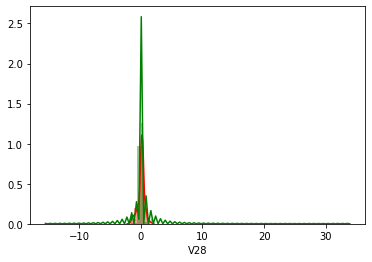

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
col='V28'
## V13 V20 V23 V28 seems irrelevant 

sns.distplot(creditcard[col][creditcard.Class == 1], bins=50, color='r')
sns.distplot(creditcard[col][creditcard.Class == 0], bins=50, color='g')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x = creditcard.drop(['Class','Time'],axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
## logistic regression after removing some featuers
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)

x_train2=x_train.drop(['V13','V20','V23','V28'],axis=1)
x_test2=x_test.drop(['V13','V20','V23','V28'],axis=1)


from sklearn.linear_model import LogisticRegression
model_lr2 = LogisticRegression()
model_lr2.fit(x_train2, y_train)
ACC_train_lr2 = model_lr2.score(x_train2, y_train)
ACC_test_lr2 = model_lr2.score(x_test2, y_test)


In [ ]:
## accuracy
lr_pred = model_lr.predict(x_test)
lr_pred2 = model_lr2.predict(x_test2)

from sklearn.metrics import accuracy_score
lr_accuracy_score=  accuracy_score(y_test, lr_pred)
lr_accuracy_score2=  accuracy_score(y_test, lr_pred2)

from sklearn.metrics import f1_score
lr_f1_score= f1_score(y_test, lr_pred)
lr_f1_score2= f1_score(y_test, lr_pred2)

from sklearn.metrics import recall_score
lr_recall_score= recall_score(y_test, lr_pred)
lr_recall_score2= recall_score(y_test, lr_pred2)

from prettytable import PrettyTable
t2 = PrettyTable(['Accuracy', 'Logistic (%)' , 'Logistic v2 (%)' ])
t2.add_row(['accuracy_score', lr_accuracy_score*100, lr_accuracy_score2*100])
t2.add_row(['f1_score',       lr_f1_score*100      , lr_f1_score2*100      ])
t2.add_row(['recall_score',   lr_recall_score*100  , lr_recall_score2*100  ])
print(t2)


+----------------+-------------------+-------------------+
|    Accuracy    |    Logistic (%)   |  Logistic v2 (%)  |
+----------------+-------------------+-------------------+
| accuracy_score | 99.90871107053826 | 99.91222218320986 |
|    f1_score    | 64.86486486486487 | 67.94871794871794 |
|  recall_score  | 51.06382978723404 | 56.38297872340425 |
+----------------+-------------------+-------------------+


Observations:

Execluding irrelevant featuers ('V13','V20','V23','V28') shows minor enhancemnt in accurecy 

In [ ]:
## logistic regression after removing some featuers
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
ACC_train_lr = model_rf.score(x_train, y_train)
ACC_test_lr = model_rf.score(x_test, y_test)

x_train2=x_train.drop(['V13','V20','V23','V28'],axis=1)
x_test2=x_test.drop(['V13','V20','V23','V28'],axis=1)

from sklearn.ensemble import RandomForestClassifier 
model_lr2 = RandomForestClassifier()
model_lr2.fit(x_train2,y_train)
ACC_train_lr2 = model_lr2.score(x_train2, y_train)
ACC_test_lr2 = model_lr2.score(x_test2, y_test)

In [ ]:
## accuracy
lr_pred = model_lr.predict(x_test)
lr_pred2 = model_lr2.predict(x_test2)

from sklearn.metrics import accuracy_score
lr_accuracy_score=  accuracy_score(y_test, lr_pred)
lr_accuracy_score2=  accuracy_score(y_test, lr_pred2)

from sklearn.metrics import f1_score
lr_f1_score= f1_score(y_test, lr_pred)
lr_f1_score2= f1_score(y_test, lr_pred2)

from sklearn.metrics import recall_score
lr_recall_score= recall_score(y_test, lr_pred)
lr_recall_score2= recall_score(y_test, lr_pred2)

from prettytable import PrettyTable
t2 = PrettyTable(['Accuracy', 'Logistic (%)' , 'Logistic v2 (%)' ])
t2.add_row(['accuracy_score', lr_accuracy_score*100, lr_accuracy_score2*100])
t2.add_row(['f1_score',       lr_f1_score*100      , lr_f1_score2*100      ])
t2.add_row(['recall_score',   lr_recall_score*100  , lr_recall_score2*100  ])
print(t2)

+----------------+-------------------+-------------------+
|    Accuracy    |    Logistic (%)   |  Logistic v2 (%)  |
+----------------+-------------------+-------------------+
| accuracy_score | 99.91397773954567 | 99.96664442961975 |
|    f1_score    | 71.00591715976331 | 89.72972972972973 |
|  recall_score  |        60.0       |        83.0       |
+----------------+-------------------+-------------------+


Observations:

Execluding irrelevant featuers ('V13','V20','V23','V28') shows **good** enhancemnt in accurecy when using random forest

# Exploratory Data Analysis EDA

In [ ]:
creditcard.shape

In [ ]:
creditcard.head()

We used the plot above to check the distribution of observations for each featur and one by one , for example V4: shows clear distinction between fraud & genuine transactions, while V28 didn't.

In [ ]:
def my_plot(plot_rows,plot_col,i,col):
    plt.subplot(plot_rows,plot_col,i)
    sns.boxplot(x='Class',y=col,data=creditcard)

plt.figure(figsize=(24,12))
axs = [ my_plot(6,5,i,'V'+str(i)) for i in range(1,29)]


In [ ]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

Observations:

By looking at the above plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

In [ ]:
sns.scatterplot(x = "Class", y = "Amount", data = creditcard)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

**ECDF**

In [ ]:
# Creating our ecdf function
def ecdf(data,i):
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data)+1)/len(data)
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title('ECDF of average V'+str(i))

creditcardFraud=creditcard[creditcard['Class']==1]
creditcardNotFraud=creditcard[creditcard['Class']==0]

for i in range(1,29):
    ecdf(creditcardFraud['V'+str(i)],i)
    ecdf(creditcardNotFraud['V'+str(i)],i)
    plt.show()


#Try Different classifiers (unbalanced)

In [ ]:
from sklearn.model_selection import train_test_split
x = creditcard.drop('Class',axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 56962, size of traing data = 227845, percentage = 20.000210668979342%


In [ ]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
y

In [ ]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr*100)
print(ACC_test_lr*100)

99.885448440826
99.89115550718023


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
##  Decision tree
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
ACC_train_dt = model_dt.score(x_train,y_train)
ACC_test_dt = model_dt.score(x_test,y_test)
print(ACC_train_dt*100)
print(ACC_test_dt*100)

100.0
99.9367999719111


In [ ]:
## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)
print(ACC_train_svm*100)
print(ACC_test_svm*100)


99.83058658298405
99.8139110284049


In [ ]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)
print(ACC_train_rf*100)
print(ACC_test_rf*100)

100.0
99.95786664794073


In [ ]:
## Naive Bayse
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train,y_train)
ACC_test_nb = model_nb.score(x_test,y_test)
print(ACC_train_nb*100)
print(ACC_test_nb*100)

99.26133994601594
99.29777746567888


In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100 , ACC_train_nb*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100 , ACC_test_nb*100])
print(t)

+----------+-------------------+------------------+-------------------+-------------------+-------------------+
| Accuracy |    Logistic (%)   |      DT (%)      |      SVM (%)      |       RF (%)      |       NB (%)      |
+----------+-------------------+------------------+-------------------+-------------------+-------------------+
| Training |  99.885448440826  |      100.0       | 99.83058658298405 |       100.0       | 99.26133994601594 |
| Testing  | 99.89115550718023 | 99.9367999719111 |  99.8139110284049 | 99.95786664794073 | 99.29777746567888 |
+----------+-------------------+------------------+-------------------+-------------------+-------------------+


In [ ]:
# use differant performance metric on DT
lr_pred = model_lr.predict(x_test)
dt_pred = model_dt.predict(x_test)
svm_pred = model_svm.predict(x_test)
rf_pred = model_rf.predict(x_test)
nb_pred = model_nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
lr_accuracy_score=  accuracy_score(y_test, lr_pred)
dt_accuracy_score=  accuracy_score(y_test, dt_pred)
svm_accuracy_score=  accuracy_score(y_test, svm_pred)
rf_accuracy_score=  accuracy_score(y_test, rf_pred)
nb_accuracy_score=  accuracy_score(y_test, nb_pred)

from sklearn.metrics import f1_score
# f1 score : F1 score reaches its best value at 1 and worst score at 0
lr_f1_score= f1_score(y_test, lr_pred)
dt_f1_score= f1_score(y_test, dt_pred)
svm_f1_score= f1_score(y_test, svm_pred)
rf_f1_score= f1_score(y_test, rf_pred)
nb_f1_score= f1_score(y_test, nb_pred)

from sklearn.metrics import recall_score
# recall score : The best value is 1 and the worst value is 0
lr_recall_score= recall_score(y_test, lr_pred)
dt_recall_score= recall_score(y_test, dt_pred)
svm_recall_score= recall_score(y_test, svm_pred)
rf_recall_score= recall_score(y_test, rf_pred)
nb_recall_score= recall_score(y_test, nb_pred)

In [ ]:
from prettytable import PrettyTable
t2 = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)'])
t2.add_row(['accuracy_score', lr_accuracy_score*100, dt_accuracy_score*100, svm_accuracy_score*100, rf_accuracy_score*100 , nb_accuracy_score*100])
t2.add_row(['f1_score',       lr_f1_score*100      , dt_f1_score*100      , svm_f1_score*100       , rf_f1_score*100       , nb_f1_score*100]      )
t2.add_row(['recall_score',   lr_recall_score*100  , dt_recall_score*100  , svm_recall_score*100  , rf_recall_score*100   , nb_recall_score*100]  )
print(t2)

+----------------+-------------------+-------------------+------------------+-------------------+-------------------+
|    Accuracy    |    Logistic (%)   |       DT (%)      |     SVM (%)      |       RF (%)      |       NB (%)      |
+----------------+-------------------+-------------------+------------------+-------------------+-------------------+
| accuracy_score | 99.89115550718023 |  99.9367999719111 | 99.8139110284049 | 99.95786664794073 | 99.29777746567888 |
|    f1_score    |  69.6078431372549 | 83.33333333333334 |       0.0        | 87.87878787878786 | 28.31541218637993 |
|  recall_score  | 66.98113207547169 | 84.90566037735849 |       0.0        |  82.0754716981132 | 74.52830188679245 |
+----------------+-------------------+-------------------+------------------+-------------------+-------------------+


# Try Hyper parameter turning & cross Fold

**Cross Validation** is a very useful technique for assessing the performance of machine learning models. It helps in knowing how the machine learning model would generalize to an independent data set. and to estimate how accurate your model will predict in practice.

In [ ]:
from sklearn.model_selection import cross_val_score

##LR
from sklearn.linear_model import LogisticRegression
ACC_test_lr = cross_val_score(LogisticRegression(),x,y)

##DT
from sklearn.tree import DecisionTreeClassifier
ACC_test_dt = cross_val_score(DecisionTreeClassifier(),x,y)

##SVM
from sklearn.svm import SVC
ACC_test_svm = cross_val_score(SVC(),x,y)

##RF
## from sklearn.ensemble import RandomForestClassifier
## ACC_test_rf = cross_val_score(RandomForestClassifier(),x,y)

from sklearn.model_selection import StratifiedKFold
ACC_test_rf4 = cross_val_score(RandomForestClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_rf4)

##NB
from sklearn.naive_bayes import GaussianNB
ACC_test_nb = cross_val_score(GaussianNB(),x,y)


ACC_test_lr_mean = np.mean(ACC_test_lr);
ACC_test_dt_mean = np.mean(ACC_test_dt);
ACC_test_svm_mean = np.mean(ACC_test_svm);
ACC_test_rf_mean = np.mean(ACC_test_rf);
ACC_test_nb_mean = np.mean(ACC_test_nb);


from prettytable import PrettyTable
t = PrettyTable(['KVC Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)'])
t.add_row(['Testing', ACC_test_lr_mean*100, ACC_test_dt_mean*100, ACC_test_svm_mean*100, ACC_test_rf_mean*100, ACC_test_nb_mean*100])
print(t)